# CS 316: Introduction to Deep Learning
# Lab Exam - Fall 2022
# Dr. Abdul Samad
Total Duration: 2 Hours and 50 minutes <br/>
Total Points: 100 <br/>
Name: **Write your Name Here** <br/>
ID: **Write your Student ID** <br/>



# Instructions
1. Google Colab must be used for this exam.
2. You are not permitted to utilise the internet or any other source for this exam.
3. Any violation shall be treated as a plagarism case.

4. The error in one task will not carry to other tasks.

5. The marks for each task are stated explicitly.

6. Please carefully study the questions; they are self-explanatory.
7. Rename your file as `Lab_Exam_aa01234.ipynb` where `aa01234` will be replaced by your student id.

# Exam Overview

In this Exam, we are implementing a neural network with 3-hidden layers and we will be using it to classify digits. Since each image is a greyscale image of size 8 x 8 it is flattened into a column vector of size 64 before being fed to the multi-layer pereceptron.
<center>
<img src='https://i.postimg.cc/fbFkk22f/image-004.png' alt="drawing" width="400" />
<center/>


The neural network is defined as follows:
$$ \mathbf{z}_1 = \mathbf{W}_1 \mathbf{X} + \mathbf{b}_1 \tag{1.1} $$
$$ \mathbf{a}_1 = ReLU(\mathbf{z_1}) \tag{1.2}$$
$$ \mathbf{z}_2 = \mathbf{W}_2 \mathbf{a_1} + \mathbf{b}_2 \tag{1.3}$$
$$ \mathbf{a}_2 = ReLU(\mathbf{z_2}) \tag{1.4}$$
$$ \mathbf{z}_3 = \mathbf{W}_3 \mathbf{a_2} + \mathbf{b}_3 \tag{1.5}$$
$$ \mathbf{a}_{3} = \sigma(\mathbf{z_3}) \tag{1.6}$$
$$ \mathbf{z}_4 = \mathbf{W}_4\mathbf{a_3} + \mathbf{b}_4  \tag{1.7}$$
$$ \mathbf{\hat{y}} = Softmax(\mathbf{a}_4) \tag{1.8}$$
$$ L^{(i)} = -\sum_{j=1}^{n} \mathbf{y}^{(i)} \log(\mathbf{\hat{y}^{(i)}}) \tag{1.9}$$
$$ J =\frac{1}{m} \sum_{i=1}^{m} L^{(i)} \tag{1.10}$$



## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn import datasets
import sklearn.model_selection
from IPython.display import clear_output

# Dataset Overview

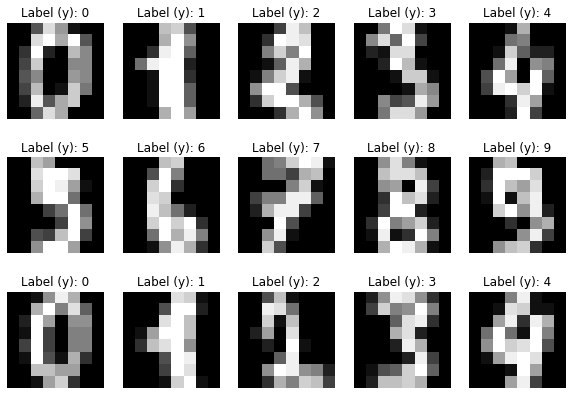

In [ ]:
data = datasets.load_digits()
X = data["data"]
Y = data["target"]

fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape((8,8)), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=Y[i]))
    plt.axis('off')

# [10 Points] Task 01 - Train Test Split

In Task 01, you are required to the implement the function `train_test_split` which splits the datasets into train and test set.

**Hint: Use `rng.shuffle` to shuffle the dataset. Furthermore, instead of shuffling the dataset, shuffle the indexes.**

In [ ]:
#TODO: Implement the function train_test_split
def train_test_split(inputs,outputs,test_size,seed = 0):
    """
    Splits the data into training and test sets.
    Return 4 numpy arrays. X_train, X_test, Y_train, Y_test
    where training data is test_size proportion of data provided.

    Args:
        inputs [np.array] : numpy array of input data
        outputs [np.array]: numpy array of output labels
        test_size [float]: proportion of data to be used as test data. e.g. 0.2 means 20% of data is used for test data.
        seed [int]: A seed to create random number generator. (For reproducability) 
    """
   
    rng = np.random.default_rng(seed)
    assert(len(inputs) == len(outputs))
    assert(test_size <= 1.0)
    assert(test_size >= 0.0)
    num_samples = len(inputs)
    num_train = int(num_samples * (1.0 - test_size))
    # Write your code here
    
    return X_train,X_test,Y_train,Y_test

In [ ]:
# DO NOT EDIT
# Test Case to check Train Test Split
np.random.seed(1)
x = np.random.randn(15,2)
y = np.random.randn(15)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
assert np.allclose (X_train,np.array([[ 0.86540763, -2.3015387 ],[ 0.90159072,  0.50249434],[ 1.74481176, -0.7612069 ],[-1.10061918,  1.14472371],[ 1.62434536, -0.61175641],[ 0.3190391 , -0.24937038],[ 1.13376944, -1.09989127],[ 1.46210794, -2.06014071],[-0.26788808,  0.53035547],[ 0.90085595, -0.68372786],[-0.3224172 , -0.38405435],[ 0.04221375,  0.58281521]]))
assert np.allclose (X_test,np.array([[-0.12289023, -0.93576943],[-0.17242821, -0.87785842],[-0.52817175, -1.07296862]]))
assert np.allclose (Y_train,np.array([-0.6871727 , -0.88762896, -0.84520564, -0.19183555, -0.69166075,-0.67124613,  0.2344157 , -0.0126646 ,  0.05080775, -0.74715829,-1.11731035,  0.74204416]))
assert np.allclose (Y_test, np.array([ 1.6924546 ,  1.65980218, -0.39675353]))


(12, 2) (3, 2) (12,) (3,)


# [10 Points] Task 02 -  Activation Functions

In this task, you will be implementing the Sigmoid and ReLU activation fuctions.

## [5 Points]  Part A - Relu Activation Function

The Relu activation function and its dervivative are defined as  follows:
$$ f(z) = \max(z,0) \tag{2.1} $$
$$ f^{\prime}(z) = \begin{cases}1 & z > 0 \\0 & z < 0 \\
\end{cases}
\tag{2.2}
$$

In [ ]:
#TODO: Implement the Relu class which implements the Relu activation function.
class Relu:
   """
   Implements the Relu activation
   """
   @staticmethod
   def activation(z):
      # Write your code here
      # Hint: Use np.maximum
      # Refer to equation (2.1)
      
   @staticmethod
   def prime(z):
      # Write your code here
      # Hint: Use np.where
      # Refer to equation (2.2)
     

In [ ]:
# DO NOT EDIT
# Test Case to Check ReLU
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
print(f"Input: {input}")
output = Relu.activation(input)
print(f"Output: {output}")
assert np.allclose(output,np.array([[0.30471708,0.,0.7504512 ],[0.94056472,0.,0.],[0.1278404, 0.,0.]]))
grad = Relu.prime(input)
print(f"Gradient: {grad}")
assert np.allclose(grad,np.array([[1,0,1],[1,0,0],[1,0,0]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[0.30471708 0.         0.7504512 ]
 [0.94056472 0.         0.        ]
 [0.1278404  0.         0.        ]]
Gradient: [[1. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


## [5 Points] Part B - Sigmoid Activation Function

The sigmoid activation function and its derivative are defined as follows:
$$ \sigma (z) = \frac{1}{1+\exp{(-z)}} \tag{3.1} $$

$$ \sigma^{\prime} (z) = \sigma(z) \times (1 - \sigma(z)) \tag{3.2} $$

In [ ]:
#TODO: Implement the Sigmoid class which implements the Sigmoid activation function.
class Sigmoid:
    @staticmethod
    def activation(z):
      # Write your code here
      # Refer to equation (3.1)
      
    @staticmethod
    def prime(z):
      # Write your code here
      # Refer to equation (3.2)
      

In [ ]:
# DO NOT EDIT
# Test Case to Check Sigmoid
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
print(f"Input: {input}")
output = Sigmoid.activation(input)
print(f"Output: {output}")
assert np.allclose(output,np.array([[0.57559524, 0.26115306, 0.679277 ],[0.71921371, 0.12444053, 0.21379844],[0.53191664, 0.42159173, 0.49579981]]))
grad = Sigmoid.prime(input)
print(f"Gradient: {grad}")
assert np.allclose(grad, np.array([[0.24428536, 0.19295214, 0.21785976],[0.20194535, 0.10895508, 0.16808867],[0.24898133, 0.24385214, 0.24998236]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[0.57559524 0.26115306 0.679277  ]
 [0.71921371 0.12444053 0.21379844]
 [0.53191664 0.42159173 0.49579981]]
Gradient: [[0.24428536 0.19295214 0.21785976]
 [0.20194535 0.10895508 0.16808867]
 [0.24898133 0.24385214 0.24998236]]


# [5 Points ] Task 03 - Softmax

In this task you are required to implement a **numerically stable** version of the Softmax activation.

The Softmax function is defined as follows:
$$ S(y_i) = \frac{\exp{(y_i)}}{\sum_{j=1} \exp{(y_j)} } \tag {4.1} $$

**Hint: In order to implement a numerically stable version of the Softmax activation function, subtract the max of each row from each element in the row**

In [ ]:
#TODO: Implement the Softmax class which implements the softmax activation function.
class Softmax:
    @staticmethod
    def activation(z):
      # Write your code here
      # Refer to equation (4.1)


In [ ]:
# DO NOT EDIT
# Test Case to check Softmax activation function
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
print(f"Input: {input}")
output = Softmax.activation(input)
print(f"Output: {output}")
assert np.allclose(output, np.array([[0.35432675, 0.09234378, 0.55332948],[0.86084143, 0.04776582, 0.09139274],[0.39892377, 0.25587457, 0.34520167]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[0.35432675 0.09234378 0.55332948]
 [0.86084143 0.04776582 0.09139274]
 [0.39892377 0.25587457 0.34520167]]


# [10 Points] Task 04 - Cross Entropy Loss

In this task, you are required to implement the Cross Entropy Loss function as well compute the derivative of the Cross Entropy Loss function with respect to the Softmax activation function.

The cross entropy loss function is defined as follows:
$$ L^{(i)} = -\sum_{j=1}^{n} \mathbf{y}^{(i)}  \log(\mathbf{\hat{y}^{(i)}}) \tag {5.1}$$
$$ J =\frac{1}{m} \sum_{i=1}^{m} L^{(i)} \tag {5.2} $$

The derivative of the Softmax activation function is defined as
$$ \frac{\delta L^{(i)}}{\delta o_j} = \frac{\exp{o_j}}{\sum_{i=1}^{q} \exp{(o_i)}} - y_{j}^{(i)} = softmax(o_j) - y_{j}^{(i)} = \hat{y}_{j}^{(i)} -  y_{j}^{(i)} \tag {5.3}$$


where $\mathbf{y}^{(i)}$ is the one hot encoded label vector and $\mathbf{\hat{y}}^{(i)}$ are the Softmax probabilities.







In [ ]:
#TODO: Implement the class CrossEntropy which represents the cross-entropy loss function.
class CrossEntropy:
    """
    Used with Softmax activation in final layer
    """
    @staticmethod
    def activation(z):
        # DO NOT EDIT
        return Softmax.activation(z)

    @staticmethod
    def delta(y_true, y):
        n,c = y.shape
        y_hot = np.eye(c)[y_true]
        y_hat = Softmax.activation(y)
        # Write your code here
        # Refer to equation (5.3)
        grad = # IMPLEMENT
        return grad

    @staticmethod
    def loss(y_true, y):
        m,c = y.shape
        y_hot = np.eye(c)[y_true]
        y_hat = Softmax.activation(y)
        # Write your code here
        # Refer to equations (5.1) & (5.2)
        loss = # IMPLEMENT
        return loss

In [ ]:
# DO NOT EDIT
# Test Case to check Softmax activation function
rng = np.random.default_rng(42)
y_hat = rng.normal(size=(3,3))
print(f"y_hat: {y_hat}")
y = np.arange(3)
print(f'y: {y}')
loss = CrossEntropy.loss(y,y_hat)
print(f"Cross Entropy Loss: {loss}")
assert loss == 1.7142023787723455
delta = CrossEntropy.delta(y,y_hat)
print(f"Delta: {delta}")
assert np.allclose(delta, np.array([[-0.64567325,  0.09234378, 0.55332948],[ 0.86084143, -0.95223418 , 0.09139274],[ 0.39892377 , 0.25587457 ,-0.65479833]]))


y_hat: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
y: [0 1 2]
Cross Entropy Loss: 1.7142023787723455
Delta: [[-0.64567325  0.09234378  0.55332948]
 [ 0.86084143 -0.95223418  0.09139274]
 [ 0.39892377  0.25587457 -0.65479833]]


# [10 Points ] Task 05 - Network Initialisation

In this task, you are required to implement the `Network` class which represents the neural network. The `__init__` function takes as an arguements two parameters: dimensions and activations. Dimensions is a list which contains the number of nodes in each layer, and activations is a list which contains the activation functions of each layer.

We use Xavier Initialisation to initialise the weights i.e. $\mathbf{W}^{(L)} \sim N(0,\frac{2}{Inputs + Outputs}) $. In addition to, we initialise the biases as zeros.

**Hint: Use `np.random.normal` to initialise the weights. Mean is specified using `loc` and standard deviation is specified by `scale`**

In [ ]:
#TODO: Implement the Network class which represents the neural network.
class Network:

    def __init__(self, dimensions, activations):
        """
        Args
          dimensions: (list) Dimensions of the neural net. (input, hidden layer, output)
          activations: (list) Activations functions.
        """        
        self.n_layers = len(dimensions)
        self.loss = None
        self.learning_rate = None

        # Weights and biases are initiated by index. For a one hidden layer net you will have a w[1] and w[2]
        self.w = {}
        self.b = {}

        # Activations are also initiated by index. For the example we will have activations[2] and activations[3]
        self.activations = {}

        for i in range(len(dimensions) - 1):
            # Hint: Use np.sqrt as scale represents standard deviation
            self.w[i + 1] = # IMPLEMENT
            self.b[i + 1] = # IMPLEMENT
            self.activations[i + 2] = # IMPLEMENT

In [ ]:
# DO NOT EDIT
# Test Case to check Network Initialisation
W = {1: np.array([[-0.26358081, -0.03558627, -1.35104904],[ 1.03739835, -1.13426826, -0.53236778]]), 2: np.array([[ 0.35559086],[-0.88055165],[-0.74808519]])}
B = {1: np.array([0., 0., 0.]), 2: np.array([0.])}
Activations = {2: Relu, 3: Sigmoid}
np.random.seed(2)
nn = Network((2, 3, 1), (Relu, Sigmoid))
for i in nn.w:
  print(f"W[{i}]: {nn.w[i]}\nW[{i}] Shape: {nn.w[i].shape}")
for i in nn.b:
  print(f"B[{i}]: {nn.b[i]}\nB[{i}] Shape: {nn.b[i].shape}")
for i in nn.activations:
  print(f"A[{i}]: {nn.activations[i]}")
for key,value in nn.w.items():
  assert np.allclose(nn.w[key],  W[key])
for key,value in nn.b.items():
  assert np.allclose(nn.b[key],  B[key])
for key,value in nn.activations.items():
  assert nn.activations[key] ==  Activations[key]

W[1]: [[-0.26358081 -0.03558627 -1.35104904]
 [ 1.03739835 -1.13426826 -0.53236778]]
W[1] Shape: (2, 3)
W[2]: [[ 0.35559086]
 [-0.88055165]
 [-0.74808519]]
W[2] Shape: (3, 1)
B[1]: [0. 0. 0.]
B[1] Shape: (3,)
B[2]: [0.]
B[2] Shape: (1,)
A[2]: <class '__main__.Relu'>
A[3]: <class '__main__.Sigmoid'>


# [15 Points] Task 06 - Forward Pass

In this task, you are require to implement the forward which executes the forward pass.

$$ \mathbf{z}_ i =  \mathbf{a}_{(i - 1)} \cdot \mathbf{w}_i + \mathbf{b}_i \tag {6.1} $$
$$ f(\mathbf{z}_i) = \mathbf{a}_i \tag{6.2} $$



In [ ]:
#TODO: Implement the function forward which represents the forward pass of a Neural Network.
def forward(model,X):
      """
      Args
        model: (Network) Network Object
        X: (array) Batch of input data vectors.
      Return
        (z,a): (tuple) Node outputs and activations per layer. 
      """
      # w(x) + b
      z = {}
      # activations: f(z)
      # First layer has no activations as input. The input x is the input.
      a = {1: #IMPLEMENT}  
      for i in range(1, model.n_layers):
          # current layer = i
          # activation layer = i + 1
          # Refer to equation (6.1)
          z[i + 1] = # IMPLEMENT
          # Pass the output from the layer z[i+1] to the model.activations[i+1] activation 
          # Refer to equation (6.2)
          a[i + 1] = # IMPLEMENT
      return z, a

In [ ]:
# DO NOT EDIT
# Test Case to check forward pass
Z = {
2: np.array([[ 0.25129181, -0.52534809, -1.27929731],[ 0.49713851, -0.82155671, -1.53126416],[ 0.98728567, -1.10996888, -0.64662812],[ 0.61483999, -0.91869391, -1.44681237],[ 0.43346133, -0.51541756, -0.41285876],[ 0.86368923, -1.06439543, -0.99434613],[ 0.68382105, -0.95614514, -1.30790512],[ 0.1188616 , -0.27352912, -0.7200489 ],[-0.07997399, -0.09212149, -0.78324549],[ 0.43713991, -0.74592918, -1.45444807]]), 
3: np.array([[0.08935707],[0.17677791],[0.35106976],[0.21863148],[0.15413489],[0.30711999],[0.24316052],[0.0422661 ],[0.],[0.15544296]])
}
A = {
1: np.array([[0.77395605, 0.43887844],[0.85859792, 0.69736803],[0.09417735, 0.97562235],[0.7611397 , 0.78606431],[0.12811363, 0.45038594],[0.37079802, 0.92676499],[0.64386512, 0.82276161],[0.4434142 , 0.22723872],[0.55458479, 0.06381726],[0.82763117, 0.6316644 ]]),
2: np.array([[0.25129181, 0.        , 0.        ],[0.49713851, 0.        , 0.        ],[0.98728567, 0.        , 0.        ],[0.61483999, 0.        , 0.        ],[0.43346133, 0.        , 0.        ],[0.86368923, 0.        , 0.        ],[0.68382105, 0.        , 0.        ],[0.1188616 , 0.        , 0.        ],[0.        , 0.        , 0.        ],[0.43713991, 0.        , 0.        ]]),
3: np.array([[0.52232442],[0.54407974],[0.58687697],[0.55444119],[0.53845761],[0.57618213],[0.56049236],[0.51056495],[0.5       ],[0.53878268]])
}
np.random.seed(2)
nn = Network((2, 3, 1), (Relu, Sigmoid))
rng = np.random.default_rng(42)
input = rng.random((10,2))
print(f"Input: {input}")
z,a = forward(nn,input)
for key,value in a.items():
  print(f"A[{key}]: {value.shape}: {value}")
for key,value in z.items():
  print(f"Z[{key}]: {value.shape}: {value}")
for key,value in a.items():
  assert np.allclose(a[key],A[key])
for key,value in z.items():
  assert np.allclose(z[key],Z[key])


Input: [[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]
A[1]: (10, 2): [[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]
A[2]: (10, 3): [[0.25129181 0.         0.        ]
 [0.49713851 0.         0.        ]
 [0.98728567 0.         0.        ]
 [0.61483999 0.         0.        ]
 [0.43346133 0.         0.        ]
 [0.86368923 0.         0.        ]
 [0.68382105 0.         0.        ]
 [0.1188616  0.         0.        ]
 [0.         0.         0.        ]
 [0.43713991 0.         0.        ]]
A[3]: (10, 1): [[0.52232442]
 [0.54407974]
 [0.58687697]
 [0.55444119]
 [0.53845761]
 [0.57618213]
 

# [5 Points] Task 07 - Compute Prediction

In this task, you are required to implement the function predict which outputs the prediction of the model.

**Hint: Use `np.argmax(axis=1)`**

In [ ]:
#TODO: Implement the function predict which outputs the prediction of the model.
def predict(model, X):
    """
    Args
      model: (network) Neural
      X: (array) Input
    :return: (array) A 1D array of predicted labels
    """
    # Compute forward pass
    _, a = # IMPLEMENT
    pred= # IMPLEMENT
    return pred

In [ ]:
# DO NOT EDIT
# Test Case to check predict
np.random.seed(2)
nn_1 = Network((2, 3, 10), (Sigmoid, Softmax))
rng = np.random.default_rng(42)
input = rng.random((10,2))
print(f"Input: {input}")
pred = predict(nn_1,input)
print(f"Prediction: {pred}")
assert np.allclose(pred,np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

Input: [[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]
Prediction: [5 5 5 5 5 5 5 5 5 5]


#[5 Points] Task 08 - Compute accuracy

In this task, you are required to implement the function `compute_accuracy` which takes as parameters the actual and predicted labels, and then returns the accuracy.

In [ ]:
#TODO: Implement the function compute_accuracy which implements the 
def compute_accuracy(y_pred,y_actual):
  acc = # IMPLEMENT
  return acc

In [ ]:
# DO NOT EDIT
# Test case to check the compute_accuracy function
accuracy = compute_accuracy(np.array([1,2,3,4,5]),np.ones(5))
print(accuracy)

0.2


# [15 Points] Task 09 - Backpropagation

In this task, you are required to implement the function `backprop` which executes the backward pass on the Neural Network. 

The following are the important equations for backpropagation

* Output Layer
$$ \delta^{(L)} = J' \cdot f'^{(L)}(z^{(L)}) \tag{7.1} $$ where $L$ indicates the last year.
* Hidden Layer
$$ \delta^{(i)} =  (\delta^{(i + 1)} \cdot w^{(i)\top}) \odot f'^{(i)}(z^{(i)}) \tag{7.2} $$ where $\odot$ indicates elementwise multiplication.
* All Layers
$$\frac{\partial{J}}{\partial{w^{(i - 1)}}} =  a^{(i - 1)\top} \cdot \delta^{(i)} \tag {7.3} $$

$$ \frac{\partial{J}}{\partial{b^{(i - 1)}}} = \delta^{(i)} \tag{7.4} $$

Note: $\delta$ is denoted by `delta`. $\frac{\partial{J}}{\partial{b^{(i - 1)}}}$ is denoted by `db`. $\frac{\partial{J}}{\partial{w^{(i - 1)}}}$ is denoted by `dw`



In [ ]:
def backprop(model, z, a, y_true):
    """
    The input dicts keys represent the layers of the net.
    a = { 1: x,
          2: f(w1(x) + b1)
          3: f(w2(a2) + b2)
    }
    Args
      model: (Network) Neural Network
      z: (dict) w(x) + b
      a: (dict) f(z)
      y_true: (array) One hot encoded truth vector.
    """

    # Determine partial derivative and delta for the output layer.
    # delta output layer
    # Refer to equation (7.1)
    delta = model.loss.delta(y_true, a[model.n_layers])
    # Refer to equation (7.3)
    dw = np.dot(a[model.n_layers - 1].T, delta)
    # Refer to equation (7.4)
    db = np.mean(delta, axis=0)

    update_params = {
        model.n_layers - 1: (dw, delta,db)
    }
    # In case of three layer net will iterate over i = 2 and i = 1
    # Determine partial derivative and delta for the rest of the layers.
    # Each iteration requires the delta from the previous layer, propagating backwards.
    for i in reversed(range(2, model.n_layers)):
        # Refer to equation (7.2)
        # Hint: delta[i+1] refers to the current value of delta, and delta[i] refers to the previous value of delta.
        delta = # IMPLEMENT
        # Refer to equation (7.3)
        dw = # IMPLEMENT
        # Refer to equation (7.4)
        # Hint: Use np.mean(axis=0)
        db = # IMPLEMENT
        update_params[i - 1] = (dw, delta,db)

    # Update the weights and biases
    for index, (dw,delta,db) in update_params.items():
      # w = w - lr * dw
      model.w[index] = # IMPLEMENT
      # b = b - lr * db
      model.b[index] = # IMPLEMENT


In [ ]:
np.random.seed(2)
rng = np.random.default_rng(42)
nn_1 = Network((2, 3, 10), (Sigmoid, Softmax))
nn_1.learning_rate = 0.1
nn_1.loss = CrossEntropy
input = rng.random((10,2))
print(f"input: {input}")
y_true = np.arange(10)
print(f"y_true: {y_true}")
z,a = forward(nn_1,input)
backprop(nn_1,z,a,y_true)
W = {
1: np.array([[-0.27226824, -0.02672387, -1.35118418],[ 1.03448274, -1.13009851, -0.53772292]]),
2: np.array([[ 1.91646819e-01, -4.86305495e-01, -4.01227553e-01,-3.51851759e-01,  2.15498795e-01,  9.00262607e-01,2.23875820e-02, -4.45063393e-01,  1.97099785e-01,-2.34362686e-01],[-3.99426762e-03,  4.58680865e-01, -3.00731553e-01,-7.39663154e-04, -3.40449836e-01, -7.32415400e-02,9.55499608e-02, -3.77044916e-01, -1.19112104e-01,-9.38588043e-02],[-2.54866522e-01, -4.73815123e-01, -5.48427659e-01,-6.70061155e-02, -9.20670733e-02,  8.72480316e-01,-9.59579240e-01,  5.13972509e-02,  1.49910124e-01,5.25886653e-01]])
}
B = {
1: np.array([-0.00045843, -0.00015131, -0.00015516]),
2: np.array([-5.01683620e-05,  2.36204952e-04,  3.91689465e-04,  2.11468706e-04,1.42539567e-05, -1.22402523e-03,  1.89624928e-04,  3.22355945e-04,-1.28728315e-04,  3.73239533e-05])
}

for i in nn_1.w:
  print(f"W[{i}]: {nn_1.w[i]}\nW[{i}] Shape: {nn_1.w[i].shape}")
for i in nn_1.b:
  print(f"B[{i}]: {nn_1.b[i]}\nB[{i}] Shape: {nn_1.b[i].shape}")
for key,value in nn_1.w.items():
  assert np.allclose(nn_1.w[key],  W[key])
for key,value in nn_1.b.items():
  assert np.allclose(nn_1.b[key],  B[key])



input: [[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]
y_true: [0 1 2 3 4 5 6 7 8 9]
W[1]: [[-0.27226824 -0.02672387 -1.35118418]
 [ 1.03448274 -1.13009851 -0.53772292]]
W[1] Shape: (2, 3)
W[2]: [[ 1.91646819e-01 -4.86305495e-01 -4.01227553e-01 -3.51851759e-01
   2.15498795e-01  9.00262607e-01  2.23875820e-02 -4.45063393e-01
   1.97099785e-01 -2.34362686e-01]
 [-3.99426762e-03  4.58680865e-01 -3.00731553e-01 -7.39663154e-04
  -3.40449836e-01 -7.32415400e-02  9.55499608e-02 -3.77044916e-01
  -1.19112104e-01 -9.38588043e-02]
 [-2.54866522e-01 -4.73815123e-01 -5.48427659e-01 -6.70061155e-02
  -9.20670733e-02  8.72480316e-01 -9.59579240e-01  5.13972509e-02
   1.49910124e-01  5.25886653e-01]]
W[2] Shape: (3, 10)
B[1]: [-0.00045843 -0.00015131 -0.00015516]
B[1] Shape: (3,)
B[2]: [-5.01683620e

In [ ]:
nn_1.b

{1: array([-0.00045843, -0.00015131, -0.00015516]),
 2: array([-5.01683620e-05,  2.36204952e-04,  3.91689465e-04,  2.11468706e-04,
         1.42539567e-05, -1.22402523e-03,  1.89624928e-04,  3.22355945e-04,
        -1.28728315e-04,  3.73239533e-05])}

# [5 Points ] Task 10 - Create Minibatches

In this task, you are required to implement the function `create_minibatches` which splits the dataset into multiple batches

In [ ]:
#TODO: Complete create_minibatches
def create_minibatches(x,y,batch_size):
   indices = np.arange(x.shape[0])
   np.random.shuffle(indices)
   X_shuffled = # IMPLEMENT 
   Y_shuffled = # IMPLEMENT
   
   n_batches = int(np.ceil(x.shape[0] // batch_size))
   for i in range(n_batches):
     x_batch = # IMPLEMENT
     y_batch = # IMPLEMENT
     yield x_batch, y_batch

In [ ]:
# DO NOT EDIT
# Test case to check create_mini_batches
rng = np.random.default_rng(42)
input = rng.random((500,64))
output = np.arange(500)
batch = 1
for xbatch,ybatch in create_minibatches(input,output,32):
  print(f"Batch: {batch} xbatch.shape: {xbatch.shape}, ybatch.shape: {ybatch.shape}")
  assert xbatch.shape == (32,64) and ybatch.shape ==(32,)
  batch+=1

Batch: 1 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 2 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 3 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 4 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 5 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 6 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 7 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 8 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 9 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 10 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 11 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 12 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 13 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 14 xbatch.shape: (32, 64), ybatch.shape: (32,)
Batch: 15 xbatch.shape: (32, 64), ybatch.shape: (32,)


# [10 Points ] Task 11 - Fit Function

In this task, you are required to implement the `fit` function which implements the main training loop for the model.

In [ ]:
#TODO: Complete the function which implements the training loop for the model.
def fit (model, x, y, loss, epochs, batch_size, learning_rate=1e-3):
        """
        Args
          x: (array) Containing parameters
          y: (array) Containing one hot encoded labels.
          loss: Loss class (MSE, CrossEntropy etc.)
          epochs: (int) Number of epochs.
          batch_size: (int)
          learning_rate: (flt)
        """
        if not x.shape[0] == y.shape[0]:
            raise ValueError("Length of x and y arrays don't match")
        # Initiate the loss object with the final activation function
        loss_plot = []
        model.loss = loss
        model.learning_rate = learning_rate
        

        for i in range(epochs + 1):
          for x_,y_ in create_minibatches(x,y,batch_size):
            # Compute forward pass on x_
            z,a = # IMPLEMENT
            # Compute backward pass on y_
            
          # Compute forward pass on the entire dataset
          _, a = # IMPLEMENT
          # Compute the loss using y and the output from the last activation layer
          out = a[model.n_layers]
          l = # IMPLEMENT
          loss_plot.append(l)
          print(f'Epoch: {i} , Loss: {l}')
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.title("Cross Entropy Loss vs. Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Cross Entropy Loss")
        plt.plot(loss_plot)
        plt.show()

# Combining it all together

In [ ]:
# DO NOT EDIT
X = data["data"]
y = data["target"]

In [ ]:
# DO NOT EDIT
X.shape,y.shape

((1797, 64), (1797,))

In [ ]:
# DO NOT EDIT
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# DO NOT EDIT
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


Epoch: 0 , Loss: 2.216244196200133
Epoch: 1 , Loss: 2.0674083135059895
Epoch: 2 , Loss: 1.909676163807208
Epoch: 3 , Loss: 1.8072546513720127
Epoch: 4 , Loss: 1.7504778162546484
Epoch: 5 , Loss: 1.6855998511499142
Epoch: 6 , Loss: 1.6470624860864551
Epoch: 7 , Loss: 1.6276287702147634
Epoch: 8 , Loss: 1.6040001579810566
Epoch: 9 , Loss: 1.5924993625888502
Epoch: 10 , Loss: 1.572198245330661
Epoch: 11 , Loss: 1.5622729277496898
Epoch: 12 , Loss: 1.5616771814870838
Epoch: 13 , Loss: 1.5432643738303884
Epoch: 14 , Loss: 1.54139646941511
Epoch: 15 , Loss: 1.5283856256772912
Epoch: 16 , Loss: 1.539507384313876
Epoch: 17 , Loss: 1.5498547783245613
Epoch: 18 , Loss: 1.5059223761910312
Epoch: 19 , Loss: 1.5071528491075667
Epoch: 20 , Loss: 1.5243048853531782
Epoch: 21 , Loss: 1.4989530640037267
Epoch: 22 , Loss: 1.4996621234242158
Epoch: 23 , Loss: 1.4898541133952006
Epoch: 24 , Loss: 1.4883979277633026
Epoch: 25 , Loss: 1.4786931892562762
Epoch: 26 , Loss: 1.4817314116884324
Epoch: 27 , Loss:

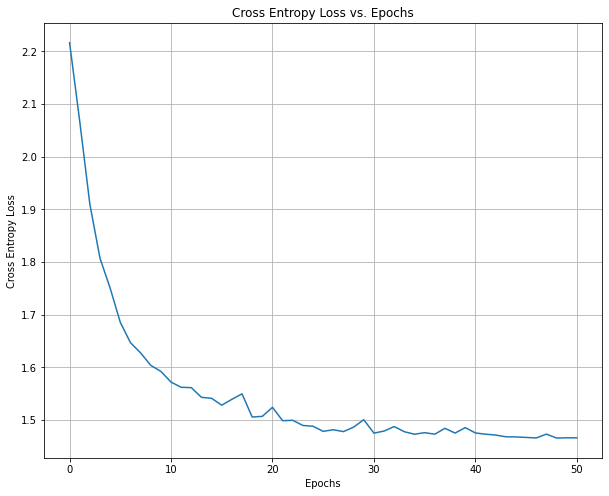

In [ ]:
# DO NOT EDIT
np.random.seed(2)
mlp = Network((64,32,64,128,10),(Relu,Relu,Sigmoid,Softmax))
fit(mlp,X_train,Y_train,CrossEntropy,batch_size=32,learning_rate=5e-4,epochs=50)

The expected plot of Cross Entropy loss vs Epochs
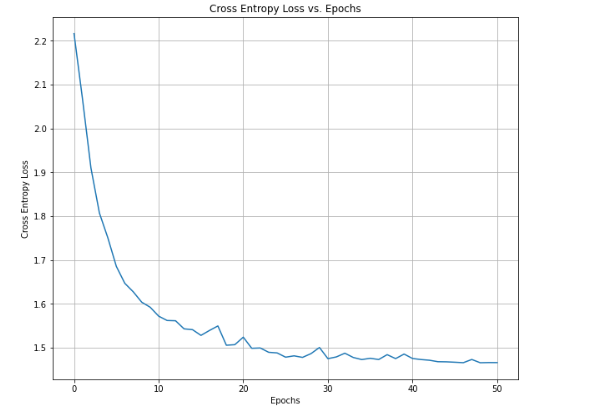

In [ ]:
#  DO NOT EDIT
y_pred = predict(mlp,X_test)
y_acc = compute_accuracy(y_pred,Y_test)
y_acc

0.9555555555555556

**The expected test accuracy is 95.5%**